<a href="https://colab.research.google.com/github/fatemehsafaee/ML-miniProjects/blob/main/ML_miniProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

student: Fatemeh Safaee /
student num: 40207974

#question1

##question1-3

#question3

In [94]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
import graphviz
from IPython.display import Image, display
import pydotplus
from sklearn import tree


In [32]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1xo-BJnURpLbLDwH5f3IqCKkBH61RexAb


Downloading...
From: https://drive.google.com/uc?id=1xo-BJnURpLbLDwH5f3IqCKkBH61RexAb
To: /content/drug200.csv
100% 5.83k/5.83k [00:00<00:00, 14.5MB/s]


In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
df3 = pd.read_csv('/content/drug200.csv')
df3

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [41]:
df3.groupby('Drug').size()      #the dataset contains 5 classes.

Drug
drugA    23
drugB    16
drugC    16
drugX    54
drugY    91
dtype: int64

In [42]:
#data shuffling:
np.random.seed(74)
final_df3 = df3.sample(frac=1).reset_index(drop=True)
final_df3

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,48,M,HIGH,NORMAL,10.446,drugA
1,55,F,HIGH,HIGH,10.977,drugB
2,37,F,HIGH,HIGH,13.091,drugA
3,34,M,NORMAL,HIGH,22.456,drugY
4,45,F,HIGH,HIGH,12.854,drugA
...,...,...,...,...,...,...
195,49,M,LOW,NORMAL,13.598,drugX
196,67,M,LOW,NORMAL,20.693,drugY
197,35,F,HIGH,HIGH,12.894,drugA
198,41,M,HIGH,NORMAL,15.156,drugY


##question3-1

In [169]:
from sklearn.model_selection import train_test_split
y = final_df3['Drug'].values
X = final_df3.drop('Drug', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 74)
X_train.shape, X_test.shape, y_train.ravel().shape, y_test.shape

((170, 5), (30, 5), (170,), (30,))

In [44]:
# one way to split data to test and train: using k-fold cross validation:

from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle = True, random_state = 74)

for train, test in kf.split(X):

  X_train_fold, y_train_fold = X[train], y[train]
  X_test_fold, y_test_fold = X[test], y[test]

  print(X_train_fold.shape, X_test_fold.shape, y_train_fold.shape, y_test_fold.shape)


(160, 5) (40, 5) (160,) (40,)
(160, 5) (40, 5) (160,) (40,)
(160, 5) (40, 5) (160,) (40,)
(160, 5) (40, 5) (160,) (40,)
(160, 5) (40, 5) (160,) (40,)


In [87]:
final_df3['BP'].unique()

array(['HIGH', 'NORMAL', 'LOW'], dtype=object)

In [170]:
# first, we need to encode the strings to some meaningful numbers:

from sklearn.preprocessing import LabelEncoder

df_encoded = final_df3.copy()  # Make a copy
for column in final_df3.columns:
  print(column)
  if final_df3[column].dtype == 'object':
     df_encoded[column] = LabelEncoder().fit_transform(final_df3[column])


df_encoded

Age
Sex
BP
Cholesterol
Na_to_K
Drug


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,48,1,0,1,10.446,0
1,55,0,0,0,10.977,1
2,37,0,0,0,13.091,0
3,34,1,2,0,22.456,4
4,45,0,0,0,12.854,0
...,...,...,...,...,...,...
195,49,1,1,1,13.598,3
196,67,1,1,1,20.693,4
197,35,0,0,0,12.894,0
198,41,1,0,1,15.156,4


1.0


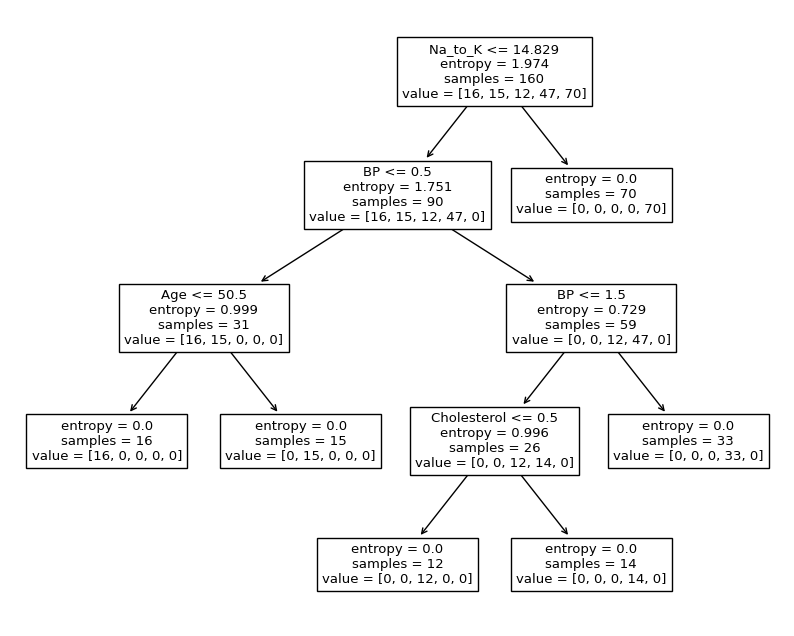

In [171]:
# Split again
X = df_encoded.drop(columns=['Drug'])
y = df_encoded['Drug']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

# classifier
clf = DecisionTreeClassifier(criterion="entropy", random_state = 74)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# evaluation
score = clf.score(X_test, y_test)
print(score)


plt.figure(figsize=(10, 8))
tree.plot_tree(clf, feature_names=X.columns);


In [158]:
# different attributes:

clf.tree_.node_count
clf.tree_.n_leaves
clf.tree_.n_node_samples
# clf.tree_.children_left
# clf.tree_.children_right
# clf.tree_.value
# clf.tree_.feature
# clf.tree_.threshold
# clf.tree_.impurity
# clf.tree_.max_depth

array([160,  90,  31,  16,  15,  59,  26,  12,  14,  33,  70], dtype=int64)

In [128]:
# model analysis:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
values = clf.tree_.value

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    # print(f'stack: ',stack)
    node_id, depth = stack.pop()
    node_depth[node_id] = depth
    # print(f'id: ',node_id)
    # print(f'dep: ', depth)
    # print(node_depth)

    # If the left and right child of a node is not the same we have a split
    # if they are equal, that is a leafNode. cause the valuse are both -1.
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node with value={value}.".format(
                space=node_depth[i] * "\t", node=i, value=values[i]
            )
        )
    else:
        print(
            "{space}node={node} is a split node with value={value}: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
                value=values[i],
            )
        )

The binary tree structure has 11 nodes and has the following tree structure:

node=0 is a split node with value=[[16. 15. 12. 47. 70.]]: go to node 1 if X[:, 4] <= 14.828500270843506 else to node 10.
	node=1 is a split node with value=[[16. 15. 12. 47.  0.]]: go to node 2 if X[:, 2] <= 0.5 else to node 5.
		node=2 is a split node with value=[[16. 15.  0.  0.  0.]]: go to node 3 if X[:, 0] <= 50.5 else to node 4.
			node=3 is a leaf node with value=[[16.  0.  0.  0.  0.]].
			node=4 is a leaf node with value=[[ 0. 15.  0.  0.  0.]].
		node=5 is a split node with value=[[ 0.  0. 12. 47.  0.]]: go to node 6 if X[:, 2] <= 1.5 else to node 9.
			node=6 is a split node with value=[[ 0.  0. 12. 14.  0.]]: go to node 7 if X[:, 3] <= 0.5 else to node 8.
				node=7 is a leaf node with value=[[ 0.  0. 12.  0.  0.]].
				node=8 is a leaf node with value=[[ 0.  0.  0. 14.  0.]].
			node=9 is a leaf node with value=[[ 0.  0.  0. 33.  0.]].
	node=10 is a leaf node with value=[[ 0.  0.  0.  0. 70.]].


##question3-2

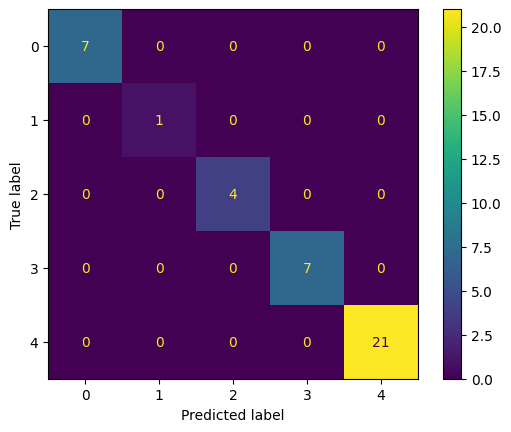

In [129]:
# confusion matrix:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
targets = df_encoded.groupby('Drug').groups.keys()
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=targets)

disp.plot()

In [132]:
# confusion matrix evaluation:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy :',accuracy_score(y_test,y_pred))
print('Precision_micro :',precision_score(y_test,y_pred,average='micro'))
print('Recall_micro :',recall_score(y_test,y_pred,average='micro'))
print('F1 score_micro :',f1_score(y_test,y_pred,average='micro'))


Accuracy : 1.0
Precision_micro : 1.0
Recall_micro : 1.0
F1 score_micro : 1.0


###pruning hyper parameters:

test score if max_depth = 3:  0.9
test score if ccp_alpha = 0.5:  0.875
test score if max_depth = 3, ccp_alpha = 0.6, max_features=3:  0.75


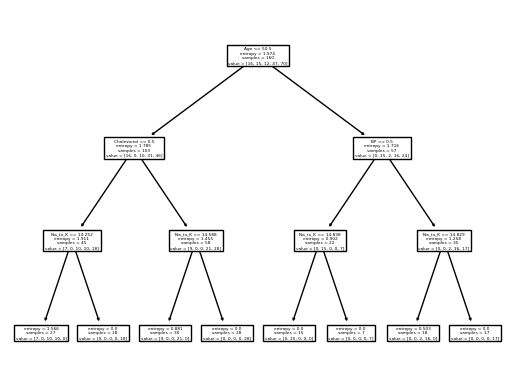

In [175]:
# classifier1
clf1 = DecisionTreeClassifier(max_depth = 3, criterion="entropy", random_state = 74)
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
# evaluation
score1 = clf1.score(X_test, y_test)
print(f'test score if max_depth = 3: ', score1)


# classifier2
clf2 = DecisionTreeClassifier(ccp_alpha=0.5, criterion="entropy", random_state = 74)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
# evaluation
score2 = clf2.score(X_test, y_test)
print(f'test score if ccp_alpha = 0.5: ', score2)

# classifier3
clf3 = DecisionTreeClassifier(max_depth = 3, ccp_alpha=0.1,max_features=3, criterion="entropy", random_state = 74)
clf3.fit(X_train, y_train)
y_pred = clf3.predict(X_test)
# evaluation
score3 = clf3.score(X_test, y_test)
print(f'test score if max_depth = 3, ccp_alpha = 0.6, max_features=3: ', score3)
clf3.tree_.node_count
tree.plot_tree(clf3, feature_names=X.columns);

##question3-3

In [173]:
# using RandomForest

from sklearn.ensemble import RandomForestClassifier

clf_forest = RandomForestClassifier(max_depth=2, random_state=74)
clf_forest.fit(X, y)
y_pred = clf_forest.predict(X_test)
score_forest = clf_forest.score(X_test, y_test)
print(score_forest)

0.9


#question4


In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1U3PoS6BBOn9NL4rU8qlHvP6oyZNO6z4b


  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0
Downloading...
From: https://drive.google.com/uc?id=1U3PoS6BBOn9NL4rU8qlHvP6oyZNO6z4b
To: /content/heart.csv
100% 38.1k/38.1k [00:00<00:00, 43.0MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
df = pd.read_csv('/content/heart.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.groupby('target').size()

target
0    499
1    526
dtype: int64

In [ ]:
#data shuffling:
np.random.seed(74)
final_df = df.sample(frac=1).reset_index(drop=True)
final_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,47,1,2,108,243,0,1,152,0,0.0,2,0,2,0
1,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
2,45,1,0,142,309,0,0,147,1,0.0,1,3,3,0
3,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
4,44,1,0,112,290,0,0,153,0,0.0,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,41,1,1,135,203,0,1,132,0,0.0,1,0,1,1
1021,51,1,2,100,222,0,1,143,1,1.2,1,0,2,1
1022,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
1023,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1


In [ ]:
y = final_df['target'].values
X = final_df.drop('target', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 74)
X_train.shape, X_test.shape, y_train.ravel().shape, y_test.shape

((820, 13), (205, 13), (820,), (205,))

In [ ]:
# scaling:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)      #we just fit the train data not the test!
X_test_scaled = scaler.transform(X_test)

In [ ]:
# NaiveBayes  Classifier:

from sklearn.naive_bayes import GaussianNB

SKNB = GaussianNB()
SKNB.fit(X_train_scaled, y_train)
y_pred = SKNB.predict(X_test_scaled)
y_test

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1])

In [ ]:
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test, y_pred)


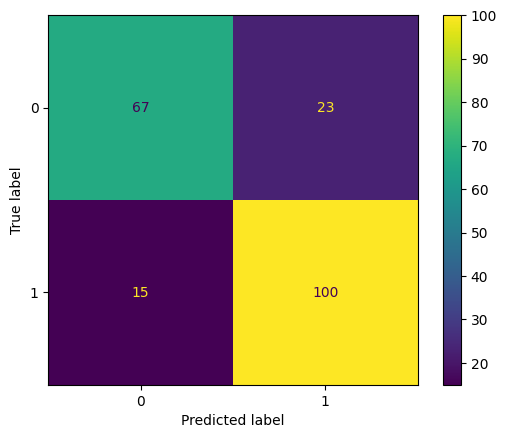

In [ ]:
# confusion matrix:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
targets = final_df.groupby('target').groups.keys()
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=targets)

disp.plot()

In [ ]:
# how to evaluate a confusion maatrix:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy :',accuracy_score(y_test,y_pred))
print('Precision :',precision_score(y_test,y_pred))
print('Recall :',recall_score(y_test,y_pred))
print('F1 score :',f1_score(y_test,y_pred))

Accuracy : 0.8146341463414634
Precision : 0.8130081300813008
Recall : 0.8695652173913043
F1 score : 0.8403361344537815


In [ ]:
# average = micro vs. average = macro:

print('Precision_micro :',precision_score(y_test,y_pred,average='micro'))
print('Precision_macro :',precision_score(y_test,y_pred,average='macro'))

print('Recall_micro :',recall_score(y_test,y_pred,average='micro'))
print('Recall_macro :',recall_score(y_test,y_pred,average='macro'))

print('F1 score_micro :',f1_score(y_test,y_pred,average='micro'))
print('F1 score_macro :',f1_score(y_test,y_pred,average='macro'))

Precision_micro : 0.8146341463414634
Precision_macro : 0.815040650406504
Recall_micro : 0.8146341463414634
Recall_macro : 0.8070048309178743
F1 score_micro : 0.8146341463414634
F1 score_macro : 0.8097029509478211


In [ ]:
ytests = []
ypreds = []
for i in range(5):
  # print(i)
  num = np.random.randint(0, X_test_scaled.shape[0])
  ytests.append(y_test[num])
  ypreds.append(y_pred[num])


print(ytests, ypreds)

[1, 0, 0, 1, 1] [1, 0, 0, 1, 0]
